In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Seaborn和matplotlib对比

In [2]:
iris = pd.read_csv('./iris.csv')

In [3]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.Name.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [5]:
color_map = dict(zip(iris.Name.unique(), ['blue','green','red']))

Text(0, 0.5, 'sepalLength')

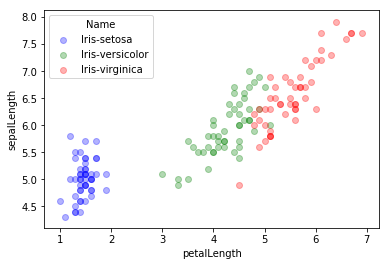

In [6]:
for species, group in iris.groupby('Name'):
    plt.scatter(group['PetalLength'], group['SepalLength'],
                color=color_map[species],
                alpha=0.3, edgecolor=None,
                label=species)
plt.legend(frameon=True, title='Name')
plt.xlabel('petalLength')
plt.ylabel('sepalLength')

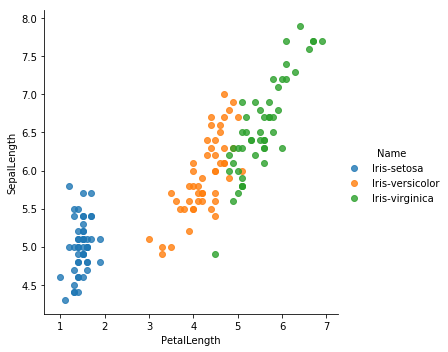

In [7]:
sns.lmplot('PetalLength', 'SepalLength', iris, hue='Name', fit_reg=False)

### 直方图

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
%matplotlib inline
s1 = Series(np.random.randn(1000))

(array([ 14.,  29.,  94., 182., 261., 208., 145.,  54.,  12.,   1.]),
 array([-2.96840666, -2.34399328, -1.71957991, -1.09516653, -0.47075316,
         0.15366022,  0.7780736 ,  1.40248697,  2.02690035,  2.65131372,
         3.2757271 ]),
 <a list of 10 Patch objects>)

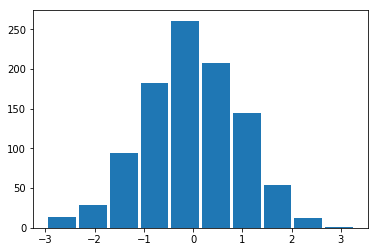

In [11]:
plt.hist(s1,rwidth=0.9)

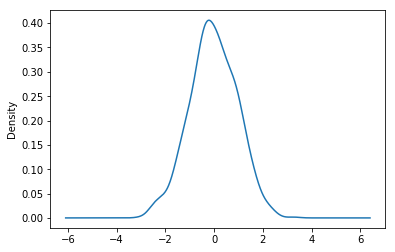

In [12]:
s1.plot(kind='kde')

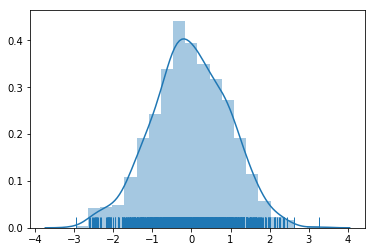

In [14]:
# rug 分布的情况
sns.distplot(s1, bins=20, hist=True, kde=True, rug=True)

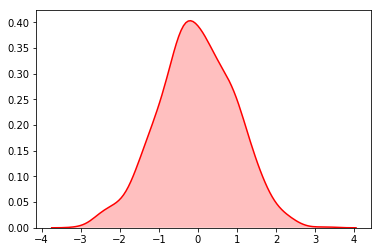

In [15]:
sns.kdeplot(s1, shade=True, color='r')

(array([ 14.,  29.,  94., 182., 261., 208., 145.,  54.,  12.,   1.]),
 array([-2.96840666, -2.34399328, -1.71957991, -1.09516653, -0.47075316,
         0.15366022,  0.7780736 ,  1.40248697,  2.02690035,  2.65131372,
         3.2757271 ]),
 <a list of 10 Patch objects>)

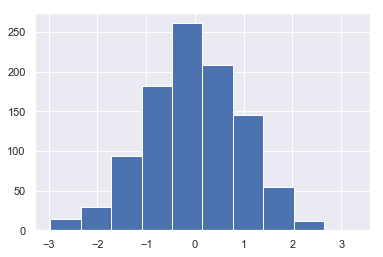

In [18]:
sns.set()
plt.hist(s1)

## seaborn实现柱状图和热力图

In [21]:
df = sns.load_dataset('flights')

In [22]:
df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [23]:
df.shape

(144, 3)

In [24]:
df = df.pivot(index='month', columns='year', values='passengers')

In [25]:
df

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


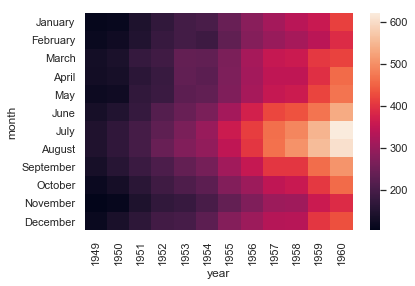

In [26]:
sns.heatmap(df)

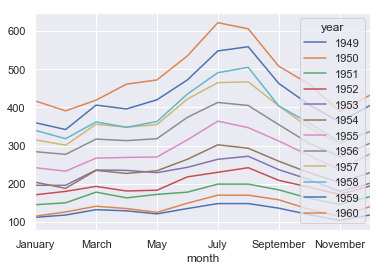

In [27]:
df.plot()

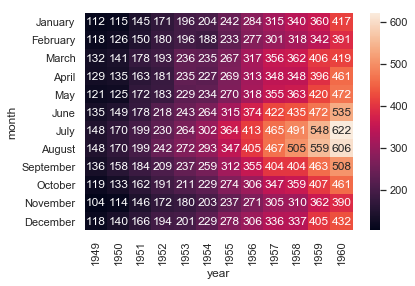

In [28]:
sns.heatmap(df, annot=True, fmt='d')

In [29]:
s = df.sum()

In [30]:
s

year
1949    1520
1950    1676
1951    2042
1952    2364
1953    2700
1954    2867
1955    3408
1956    3939
1957    4421
1958    4572
1959    5140
1960    5714
dtype: int64

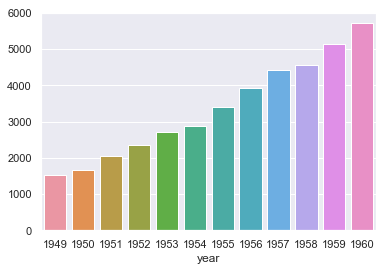

In [31]:
sns.barplot(x=s.index, y=s.values)

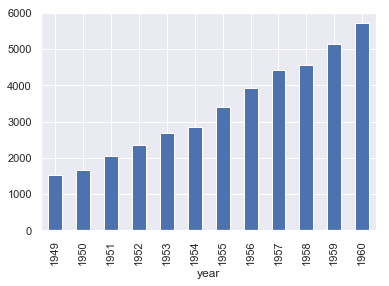

In [32]:
s.plot(kind='bar')

## seaborn设置图形显示效果

## 1. axes_style and set_style

In [36]:
x = np.linspace(0,14,100)

In [37]:
y1 = np.sin(x)
y2 = np.sin(x+2)*1.25

In [38]:
def sinplot():
    plt.plot(x, y1)
    plt.plot(x, y2)

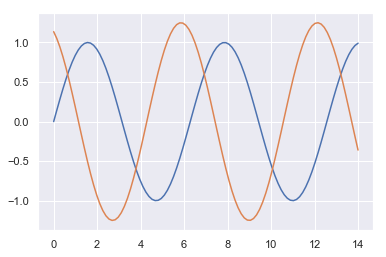

In [39]:
sinplot()

In [45]:
# seaborn格式
style = ['darkgrid', 'dark', 'white','whitegrid', 'ticks']

In [49]:
sns.set_style(style[4], {'grid.color': 'white'})

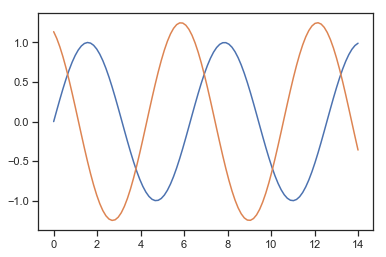

In [50]:
sinplot()

In [51]:
 sns.axes_style()

{'axes.facecolor': 'white',
 'axes.edgecolor': '.15',
 'axes.grid': False,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': 'white',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'patch.force_edgecolor': True,
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

In [52]:
# 清空
sns.set()

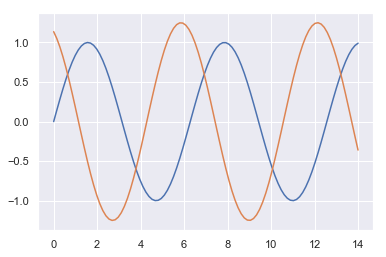

In [53]:
sinplot()

## 2. plotting_context() and set_context() 

In [54]:
context = ['paper', 'notebook', 'talk', 'poster']

In [65]:
sns.set_context(context[2],rc={'grid.linewidth': 3.0})

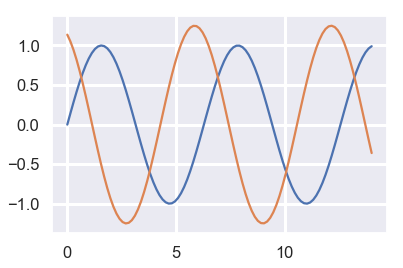

In [66]:
sinplot()

In [67]:
sns.plotting_context()

{'font.size': 18.0,
 'axes.labelsize': 18.0,
 'axes.titlesize': 18.0,
 'xtick.labelsize': 16.5,
 'ytick.labelsize': 16.5,
 'legend.fontsize': 16.5,
 'axes.linewidth': 1.875,
 'grid.linewidth': 3.0,
 'lines.linewidth': 2.25,
 'lines.markersize': 9.0,
 'patch.linewidth': 1.5,
 'xtick.major.width': 1.875,
 'ytick.major.width': 1.875,
 'xtick.minor.width': 1.5,
 'ytick.minor.width': 1.5,
 'xtick.major.size': 9.0,
 'ytick.major.size': 9.0,
 'xtick.minor.size': 6.0,
 'ytick.minor.size': 6.0}

### seaborn强大的调色功能

In [68]:
def sinplot():
    x = np.linspace(0,14,100)
    plt.figure(figsize=(8,6))
    for i in range(4):
        plt.plot(x, np.sin(x+i)*(i+0.75), label='sin(x+%s)*(%s+0.75)'% (i,i))
    plt.legend()

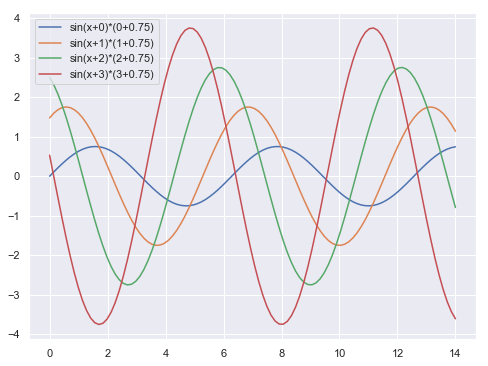

In [74]:
# 清空
sns.set()
sinplot()

In [75]:
sns.color_palette()   #RGB

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

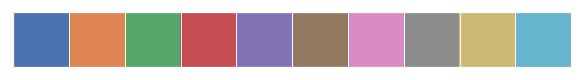

In [76]:
sns.palplot(sns.color_palette())

In [77]:
pal_style = ['deep', 'muted', 'pastel', 'bright', 'dark','colorblind']

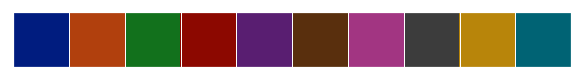

In [78]:
sns.palplot(sns.color_palette('dark'))

In [79]:
sns.set_palette(sns.color_palette('dark'))

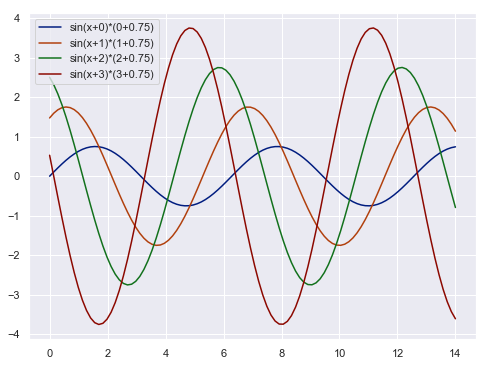

In [80]:
sinplot()

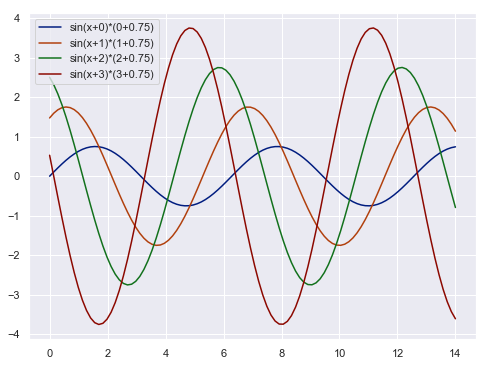

In [81]:
with sns.color_palette('dark'):
    sinplot()

In [82]:
sns.set()

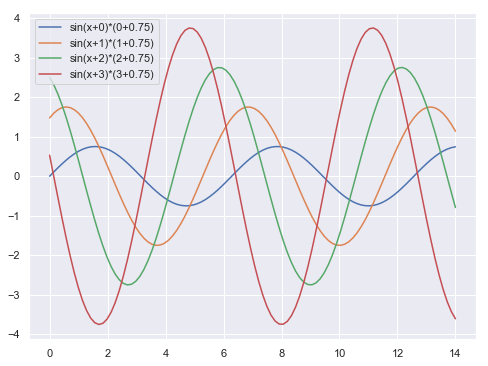

In [83]:
sinplot()

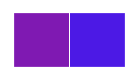

In [84]:
pal1 = sns.color_palette([(0.5,0.1,0.7),(0.3,0.1,0.9)])
sns.palplot(pal1)

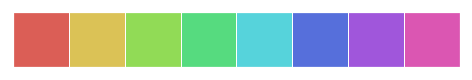

In [85]:
sns.palplot(sns.color_palette('hls', 8))